**Capacity Problem**

Here you can find optimal solution for capacity planning problem in both **Closed Form** and **Open Form**. Start reading the problem to understand what's going on! 

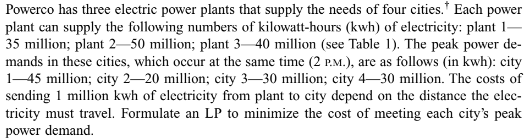

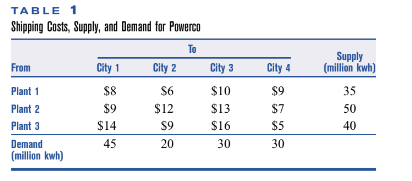

**Formulation in Open Form**

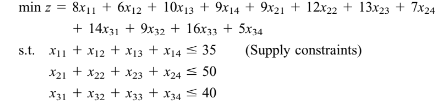

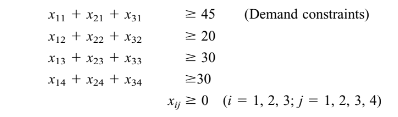

In [1]:
#!pip install gurobipy

In [2]:
import gurobipy as gp
from gurobipy import GRB
from gurobipy import quicksum

mdl = gp.Model("Problem 1")

Restricted license - for non-production use only - expires 2025-11-24


*Define Variables*

In [3]:
x11 = mdl.addVar(vtype=GRB.INTEGER, name='x11')
x12 = mdl.addVar(vtype=GRB.INTEGER, name='x12')
x13 = mdl.addVar(vtype=GRB.INTEGER, name='x13')
x14 = mdl.addVar(vtype=GRB.INTEGER, name='x14')
x21 = mdl.addVar(vtype=GRB.INTEGER, name='x21')
x22 = mdl.addVar(vtype=GRB.INTEGER, name='x22')
x23 = mdl.addVar(vtype=GRB.INTEGER, name='x23')
x24 = mdl.addVar(vtype=GRB.INTEGER, name='x24')
x31 = mdl.addVar(vtype=GRB.INTEGER, name='x31')
x32 = mdl.addVar(vtype=GRB.INTEGER, name='x32')
x33 = mdl.addVar(vtype=GRB.INTEGER, name='x33')
x34 = mdl.addVar(vtype=GRB.INTEGER, name='x34')

*Define The Objective Function*

In [4]:
mdl.setObjective(8*x11 + 6*x12 + 10*x13 + 9*x14 +
                 9*x21 + 12*x22 + 13*x23 + 7*x24 +
                 14*x31 + 9*x32 + 16*x33 + 5*x34)

*Constraints*

In [5]:
#Plant kısıtları
plant_1 = mdl.addConstr(x11 + x12 + x13 + x14 <= 35, name='Plant 1')
plant_2 = mdl.addConstr(x21 + x22 + x23 + x24 <= 50, name='Plant 2')
plant_3 = mdl.addConstr(x31 + x32 + x33 + x34 <= 40, name='Plant 3')

#City demand kısıtları
City_demand_1 = mdl.addConstr(x11 + x21 + x31 >= 45)
City_demand_2 = mdl.addConstr(x12 + x22 + x32 >= 20)
City_demand_3 = mdl.addConstr(x13 + x23 + x33 >= 30)
City_demand_4 = mdl.addConstr(x14 + x24 + x34 >= 30)

In [6]:
mdl.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i3-10100F CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 12 columns and 24 nonzeros
Model fingerprint: 0x44512cf2
Variable types: 0 continuous, 12 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 5e+01]
Found heuristic solution: objective 1355.0000000
Presolve time: 0.01s
Presolved: 7 rows, 12 columns, 24 nonzeros
Variable types: 0 continuous, 12 integer (0 binary)

Root relaxation: objective 1.020000e+03, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1020.0000000 1020.

In [7]:
for i in mdl.getVars():
    if i.x > 0:
        print(i.VarName + ' = ' + str(i.x))


x12 = 10.0
x13 = 25.0
x21 = 45.0
x23 = 5.0
x32 = 10.0
x34 = 30.0


**Formulation in Closed Form**

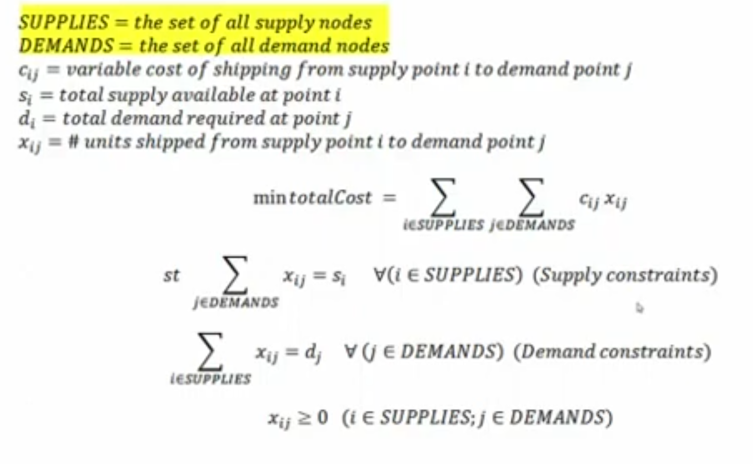

In [8]:
mdl2 = gp.Model("Problem 2")

In [9]:
num_of_plants = 3
num_of_citys = 4

n = [(i,j) for i in range (1,(num_of_plants+1)) for j in range (1,(num_of_citys+1))]
c = [8,6,10,9,9,12,13,7,14,9,16,5]
nodes, costs = gp.multidict({n[i]:c[i] for i in range(len(n))})

s = [35, 50, 40]
d = [45, 20, 30, 30]

In [10]:
costs

{(1, 1): 8,
 (1, 2): 6,
 (1, 3): 10,
 (1, 4): 9,
 (2, 1): 9,
 (2, 2): 12,
 (2, 3): 13,
 (2, 4): 7,
 (3, 1): 14,
 (3, 2): 9,
 (3, 3): 16,
 (3, 4): 5}

*Define The Variables*

In [11]:
x = mdl2.addVars(nodes, vtype= GRB.INTEGER)

*Define The Objective Function*

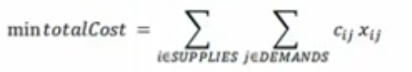

In [12]:
mdl2.setObjective(quicksum(costs[i]*x[i] for i in nodes), sense=GRB.MINIMIZE)

*Constraints*

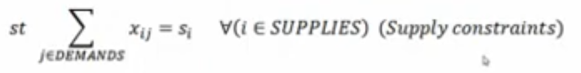

In [13]:
mdl2.addConstrs((quicksum(x[(i,j)] for j in range(1,(num_of_citys+1)))) == s[i-1] for i in range(1,(num_of_plants+1)))

{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

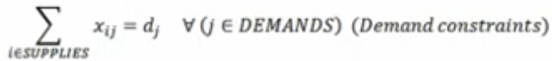

In [14]:
mdl2.addConstrs(
    (quicksum(x[(i,j)] for i in range(1,(num_of_plants+1)))) == d[j-1] for j in range (1,(num_of_citys+1)))


{1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>}

In [15]:
mdl2.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i3-10100F CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 12 columns and 24 nonzeros
Model fingerprint: 0x6cdbbf8e
Variable types: 0 continuous, 12 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 2e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 5e+01]
Found heuristic solution: objective 1115.0000000
Presolve time: 0.00s
Presolved: 7 rows, 12 columns, 24 nonzeros
Variable types: 0 continuous, 12 integer (0 binary)

Root relaxation: objective 1.020000e+03, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    1020.0000000 1020.

In [16]:
for i in mdl2.getVars():
    if i.x > 0:
        print(i.VarName + ' = ' + str(i.x))

C1 = 10.0
C2 = 25.0
C4 = 45.0
C6 = 5.0
C9 = 10.0
C11 = 30.0
